# Support Vector Machine
### One of the most popular ML algorithms
### Grew in popularity in the 90's
### Works in Vector-Space
### Binary Classifier that seperates into two groups (positive and negative)
### Works to find best seperating line/hyperplane between two groups
* Plane depends on how many classes you are seperating into
* Seperating plane's bisector has the greatest distance between the nearest points
    * If you were to draw a point from this plane to every point, you would get the greatest possible distance
    * Don't really want groups that are not near each other

In [15]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace = True)

In [18]:
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.7


#### Notes
* Vector has magnitude and direction Ex: [x,y] on a point
    * Can continue to add out 
* Magnitude is the same as norm or length of a vector
* Dot Product: Sum together the multiplicative value of same indexed values in two vectors
* SVM
    * Dot two vectors and and a bias -> check if this is greater or less than 0
        * If equal, you are on the decision boundary
    * One vector is the perpendicular vector to the plane and the other is the point we are trying to classify
    * Values in vector are features U * V + b
        * In hyperplane, b is similar to y-intercept
        * Also want to increase this, as it would move the hyperplane up
    * + Class X_i * w + b = 1 (Support Vector Equation)
    * - Class X_i * w + b = -1
    * X * w + b = 0 is the decision boundary
    * Have to multiply both sides y_i where w_i is a either 1 or -1, each class
    * We want to maximize the width between the best fit line of each class
        * Width = (X_+ - X_-) * Magnitude
        * Comes down to be 2/Magnitude(w, want to maximize this so minimize the magnitude
        * NEED TO LEARN THE CALCULATION
        * Might not be feasible with a large datasets
            * Could work with mini batches
        * However, it is easy to calculate/classify once you have trained 
    * No formula for solution as it is an optimization problem (no one right answer)
    * Convex Problem:
        * Imagine a bowl and you are trying to find where the botom point is
        * Eventually, a rolling ball will settle as this point
            * Find a global minimum, not a local minimum
        * Guess and step down (have to check all pos/neg variations of the vector you are guessing)
            * Because magnitude doesn't care for pos/neg, but dot product does
            * Decrease the step once you
    * Convex Optimization (Many Python Modules Exist CVXOpt)

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [47]:
data_dict = {1:np.array([[1,7], [2,8], [3,7]]), -1: np.array([[5,1], [6,-1], [7,3]])} #Test

class Support_Vector_Machine:
    def __init__(self, visualization = True):
        self.visualization = visualization
        self.colors = {1: 'r', -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self, data):
        self.data = data
        opt_dict = {} #{||w||: [w, b]}
        transforms = [[1,1], [-1,1],[-1,-1],[1,-1]] #Finding the best form of each magnitude
        all_data = []
        for yi in self.data: #Seperates the classes
            for featureset in self.data[yi]: #Seperates the pairs of points in each class
                for feature in featureset: #Seperates out the points in each feature
                    all_data.append(feature)
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # SV yi(xi.w+b) = 1
        # Want to set a specific pointof how far off 1 you are
        step_sizes = [self.max_feature_value*0.1,
                      self.max_feature_value*0.01,
                      self.max_feature_value*0.001] #Used for steps, expense increases with lower percent
        # Not as valuable to get b to be accurate, expensive operation
        b_range_multiple = 5
        
        b_multiple = 5 #Should do the same thing with the w and find the max, opposite
        
        latest_optimum = self.max_feature_value*10 #Cut corner
        
        for step in step_sizes:# Run once per
            w = np.array([latest_optimum, latest_optimum])
            optimized = False # We can do this because we know it is convex
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple, self.max_feature_value*b_range_multiple, step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for i in self.data: #Weakest link in SVM, runs on all data, time consuming
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t, xi) + b) >= 1: #If inequality is not upheld, throw out data
                                    found_option = False
                                    break
                        if found_option: #If its good, just let it be
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                if w[0] < 0:
                    optimized = True
                else:
                    w = w - step
            
            norms = sorted([n for n in opt_dict]) #Sort out magnitudes and take the smallest 1
            opt_choice = opt_dict[norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+ step*2
    
    def predict(self, features):
        """Is the sign of x.w+ b"""
        clf = np.sign(np.dot(np.array(features), self.w)+self.b)
        if clf != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[clf])
        return clf
    
    def visualize(self):
        # Plots the points
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i])for x in data_dict[i]] for i in data_dict]
        
        #Find the "y-value" of an inputted point
        def hyperplane(x, w, b, v):
            """Find when v=x.w+b when v = 1, -1, 0"""
            return (-w[0]*x-b+v)/w[1]
        
        #Choosing two 
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        #Getting two points for every support vector so we can graph them
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        
        plt.show()
        
        

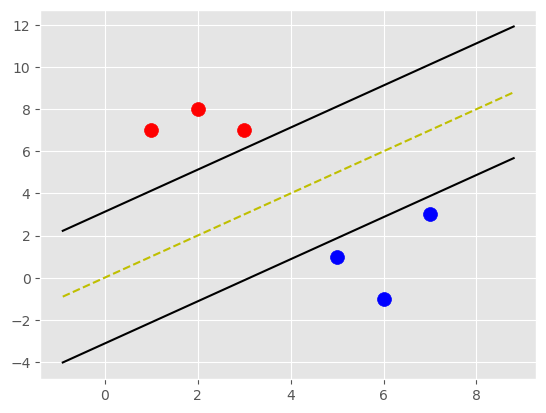

In [54]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)
svm.visualize() #Similar to a road

In [55]:
predict_us = [[0,10],[1,3],[3,4],[3,5]]
for x in predict_us:
    print(svm.predict(x))
svm.visualize()

1.0
1.0
1.0
1.0


* What if your data is not linearly seperable?
* You can add a dimension Ex. for x1 and x2, x3 = x1 * x2
* However, this is already not very resource effective
    * Would maybe need to get a crazy amount of dimensions
* Kernels: can be used to augment SVM by working with the data and making it linearly seperable
    * Uses dot/inner product because this will produce a scalar product
    * Trying to get to new dimensional space
    * Sometimes represented as phi